## Importing useful packages

In [11]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
%matplotlib notebook

## Initializing constants

In [14]:
k = 0.3    # Thermal conductivity coefficient
Lx = 10    # Width
Ly = 10    # Length

n = 250    # Spatial precision 
nx = n     # X axis precision
ny = n     # Y axis precision 

dx = Lx/nx # X axis step size
dy = Ly/ny # Y axis step size

xx = np.linspace(-Lx/2, Lx/2, nx + 1) # X Axis
yy = np.linspace(-Ly/2, Ly/2, ny + 1) # Y Axis

Tf = 8     # Integration time
dt = 0.001 # Time step

SOL = []   # Stores the evolution on T

## Setting boundary contitions

In [15]:
T   = np.zeros((nx + 1, ny + 1))    # Initial temperature equal to zero inside the domain
RHS = np.zeros((nx + 1, ny + 1))    # Initial temperature constant so RHS vanishes

T[:,0] = 200  # Left boundary condition 
T[:,n] = 200  # Right boundary condition

SOL.append(T)

## Main Loop 

In [16]:
for t in range(int(Tf/dt)):
    # Computing RHS using a first order schema
    RHS[1:-1,1:-1] = dt*k*(T[:-2,1:-1] - 2*T[1:-1,1:-1] + T[2:,1:-1] + T[1:-1,:-2] - 2*T[1:-1,1:-1] + T[1:-1,2:])/(dx**2)
    
    # Update T : T <- T + Tdot*dt
    T = T + RHS
    if t % 500 == 0:
        SOL.append(T)

## Visualization

<IPython.core.display.Javascript object>


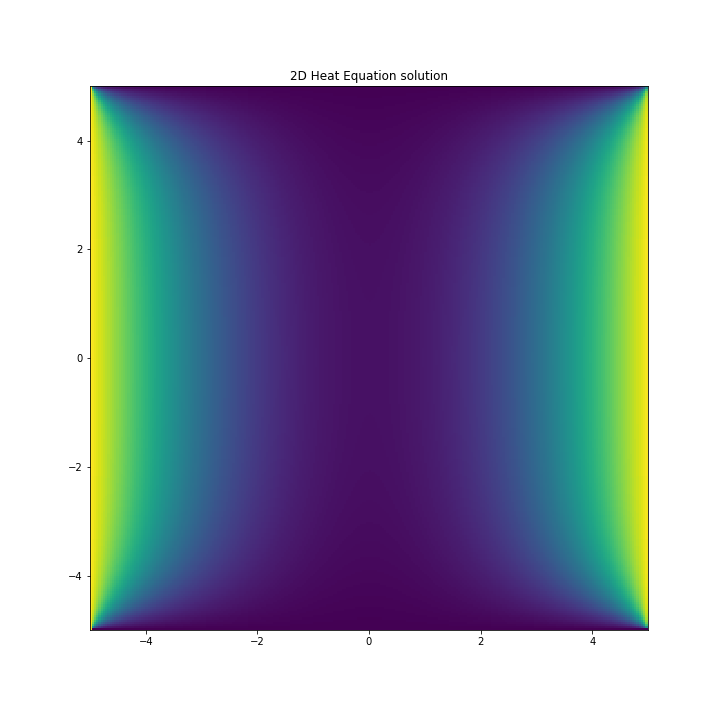

In [17]:
plt.figure(figsize=(10, 10))
plt.title("2D Heat Equation solution")
plt.pcolor(xx, yy, T)
plt.show()